## Linear Regression with Eager API
A linear regression implemented using Tensorflow's Eager API
+ Author: xiaoran
+ Time: 2019-02-20 AM.
+ Copy: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/home/xiaoran/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

# Training data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

In [5]:
# 随机化参数
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression WX+b
def linear_regression(inputs):
    return inputs * W + b

def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [6]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)


Initial cost=0.085580483 W= 0.3043687 b= 0.4249426
Epoch:0001 cost= 0.085559472 W= 0.3043047 b= 0.4253964
Epoch:0100 cost= 0.083714642 W= 0.2983375 b= 0.46770114
Epoch:0200 cost= 0.082251228 W= 0.2929961 b= 0.50556916
Epoch:0300 cost= 0.081103407 W= 0.28826562 b= 0.5391062
Epoch:0400 cost= 0.080203108 W= 0.28407615 b= 0.5688076
Epoch:0500 cost= 0.079496995 W= 0.28036585 b= 0.5951119
Epoch:0600 cost= 0.078943141 W= 0.27707988 b= 0.6184081
Epoch:0700 cost= 0.078508742 W= 0.27416977 b= 0.63903934
Epoch:0800 cost= 0.078168012 W= 0.27159244 b= 0.65731156
Epoch:0900 cost= 0.077900760 W= 0.26930988 b= 0.67349374
Epoch:1000 cost= 0.077691168 W= 0.26728833 b= 0.6878258


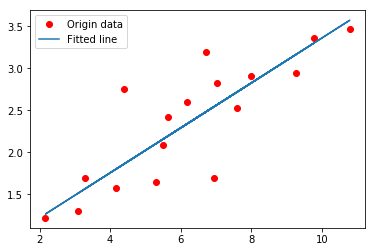

In [9]:
# Initial cost, before optimizing
print("Initial cost={:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)), 
      "W=", W.numpy(), "b=", b.numpy())


# Training
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:" '%04d'%(step+1), "cost=", "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=",b.numpy())
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Origin data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()